# **Name - Sonal Shenwai**

## **MNIST Digits - Classification Using SVM**

In this notebook, we'll explore the popular MNIST dataset and build an SVM model to classify handwritten digits.

# **Objective**
We will develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features.

# **Data Understanding and Cleaning**
Let's understand the dataset and see if it needs some cleaning etc.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2


In [6]:
#read the dataset
digits = pd .read_csv("/content/digit_svm.csv")
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
four = digits.iloc[3, 1:]
four.shape

(784,)

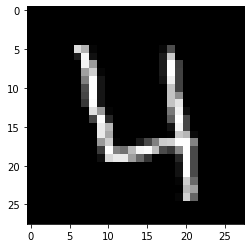

In [8]:
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')

In [9]:
# visualise the array
print(four[5:-5, 5:-5])

[[  0. 220. 179.   6.   0.   0.   0.   0.   0.   0.   0.   0.   9.  77.
    0.   0.   0.   0.]
 [  0.  28. 247.  17.   0.   0.   0.   0.   0.   0.   0.   0.  27. 202.
    0.   0.   0.   0.]
 [  0.   0. 242. 155.   0.   0.   0.   0.   0.   0.   0.   0.  27. 254.
   63.   0.   0.   0.]
 [  0.   0. 160. 207.   6.   0.   0.   0.   0.   0.   0.   0.  27. 254.
   65.   0.   0.   0.]
 [  0.   0. 127. 254.  21.   0.   0.   0.   0.   0.   0.   0.  20. 239.
   65.   0.   0.   0.]
 [  0.   0.  77. 254.  21.   0.   0.   0.   0.   0.   0.   0.   0. 195.
   65.   0.   0.   0.]
 [  0.   0.  70. 254.  21.   0.   0.   0.   0.   0.   0.   0.   0. 195.
  142.   0.   0.   0.]
 [  0.   0.  56. 251.  21.   0.   0.   0.   0.   0.   0.   0.   0. 195.
  227.   0.   0.   0.]
 [  0.   0.   0. 222. 153.   5.   0.   0.   0.   0.   0.   0.   0. 120.
  240.  13.   0.   0.]
 [  0.   0.   0.  67. 251.  40.   0.   0.   0.   0.   0.   0.   0.  94.
  255.  69.   0.   0.]
 [  0.   0.   0.   0. 234. 184.   0.   0.   0.   0

In [10]:
# Summarise the counts of 'label' to see how many labels of each digit are present
digits.label.value_counts()

1    2651
7    2447
3    2443
2    2375
6    2334
9    2313
4    2313
0    2270
8    2266
5    2110
Name: label, dtype: int64

In [11]:
# Summarise count in terms of percentage 
100*(round(digits.label.astype('category').value_counts()/len(digits.index), 4))

1    11.27
7    10.40
3    10.39
2    10.10
6     9.92
9     9.83
4     9.83
0     9.65
8     9.63
5     8.97
Name: label, dtype: float64

Thus, each digit/label has an approximately 9%-11% fraction in the dataset and the dataset is balanced. This is an important factor in considering the choices of models to be used, especially SVM, since SVMs rarely perform well on imbalanced data (think about why that might be the case).


Let's quickly look at missing values, if any.

In [12]:
# missing values - there are none
digits.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    1
pixel780    1
pixel781    1
pixel782    1
pixel783    1
Length: 785, dtype: int64

In [13]:
# average values/distributions of features
description = digits.describe()
description

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,23522.000000,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.000000,23522.000000,23522.000000,23522.000000,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.0,23522.000000,23522.000000,23522.000000,23522.000000,23522.000000,...,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.0,23521.0,23521.0,23521.0,23521.0,23521.0,23521.0,23521.0,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.000000,23521.0,23521.0,23521.0,23521.0,23521.0
mean,4.447326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005357,0.019981,0.009183,0.000383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003699,0.019939,0.074143,0.071890,0.147351,...,3.710897,2.759704,1.767527,1.073126,0.563369,0.216913,0.089792,0.029973,0.000213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010969,0.046554,0.087411,0.116662,0.183411,0.329025,0.465456,0.550487,0.546278,0.686748,0.579822,0.449768,0.307555,0.167765,0.103184,0.056673,0.021513,0.003061,0.0,0.0,0.0,0.0,0.0
std,2.879060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.759149,2.173960,1.408370,0.058682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.554372,1.794839,4.002288,3.109562,5.508246,...,26.776308,23.027854,18.438045,14.254427,10.500413,6.213599,3.877560,2.232242,0.032602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.269192,2.808227,4.090257,4.420509,5.779092,7.411951,9.697189,10.404106,9.916535,11.549144,10.415559,9.124617,7.464659,5.396632,4.370221,3.303751,2.073307,0.356176,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [15]:
digits = digits.fillna(digits.mean())

You can see that the max value of the mean and maximum values of some features (pixels) is 139, 255 etc., whereas most features lie in much lower ranges (look at description of pixel 0, pixel 1 etc. above).

Thus, it seems like a good idea to rescale the features.

## **Data Preparation for Model Building**

Let's now prepare the dataset for building the model. We'll only use a fraction of the data else training will take a long time.

In [16]:
# Creating training and test sets
# Splitting the data into train and test
X = digits.iloc[:, 1:]
Y = digits.iloc[:, 0]

# Rescaling the features
from sklearn.preprocessing import scale
X = scale(X)

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.10, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2352, 784)
(21170, 784)
(2352,)
(21170,)


In [17]:
# delete test set from memory, to avoid a memory error
# we'll anyway use CV to evaluate the model, and can use the separate test.csv file as well
# to evaluate the model finally

# del x_test
# del y_test

## **Model Building**

Let's now build the model and tune the hyperparameters. Let's start with a linear model first

Linear SVM

Let's first try building a linear SVM model (i.e. a linear kernel).

In [19]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
# predict
predictions = svm_linear.predict(x_test)
predictions[:10]

array([1, 2, 7, 1, 7, 4, 6, 0, 1, 6])

In [21]:
# evaluation: accuracy
# C(i, j) represents the number of points known to be in class i 
# but predicted to be in class j
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

array([[1946,    0,   14,    1,    2,   17,   23,    1,    4,    1],
       [   1, 2350,    9,   13,    2,    1,    1,    5,   14,    2],
       [  24,   28, 1876,   56,   30,    5,   42,   35,   25,    3],
       [  15,   12,   61, 1882,    6,   89,    3,   36,   55,   37],
       [   5,   11,   27,    3, 1901,    3,   24,   12,   11,   99],
       [  25,   17,   28,  105,   14, 1584,   39,    7,   74,   11],
       [  21,   10,   30,    1,    9,   17, 2020,    0,    8,    0],
       [   8,   37,   36,   14,   74,    3,    2, 1938,    2,   89],
       [  24,   53,   52,   64,    3,   72,   20,   25, 1680,   32],
       [  14,    7,   28,   26,  171,   10,    1,   85,   25, 1732]])

In [22]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=predictions)


0.8931979215871516

In [23]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2009
           1       0.93      0.98      0.95      2398
           2       0.87      0.88      0.88      2124
           3       0.87      0.86      0.86      2196
           4       0.86      0.91      0.88      2096
           5       0.88      0.83      0.86      1904
           6       0.93      0.95      0.94      2116
           7       0.90      0.88      0.89      2203
           8       0.89      0.83      0.86      2025
           9       0.86      0.83      0.84      2099

    accuracy                           0.89     21170
   macro avg       0.89      0.89      0.89     21170
weighted avg       0.89      0.89      0.89     21170



In [24]:
# run gc.collect() (garbage collect) to free up memory
# else, since the dataset is large and SVM is computationally heavy,
# it'll throw a memory error while training
gc.collect()

455

The final accuracy on test data is approx. 89%. Note that this can be significantly increased by using the entire training data of 42,000 images (we have used just 10% of that!).